In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# to check if any value is NaN in dataframe
df[df.isnull().any(axis=1)].head()

,sepal.length,sepal.width,petal.length,petal.width,species


In [7]:
# to shuffle the rows of the dataframe
df = df.sample(frac =1)  

,sepal.length,sepal.width,petal.length,petal.width,species
48,5.3,3.7,1.5,0.2,Setosa
31,5.4,3.4,1.5,0.4,Setosa
33,5.5,4.2,1.4,0.2,Setosa
113,5.7,2.5,5.0,2.0,Virginica
87,6.3,2.3,4.4,1.3,Versicolor
...,...,...,...,...,...
21,5.1,3.7,1.5,0.4,Setosa
73,6.1,2.8,4.7,1.2,Versicolor
80,5.5,2.4,3.8,1.1,Versicolor
112,6.8,3.0,5.5,2.1,Virginica


In [8]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [12]:
y_pred = clf.predict(xtest)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
accuracy_score(y_pred, ytest)

0.9210526315789473

In [15]:
cm = confusion_matrix(y_pred, ytest)
cm

array([[11,  0,  0],
       [ 0, 13,  3],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

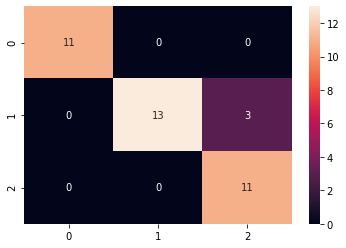

In [16]:
import seaborn as sns
sns.heatmap(cm, annot = True)

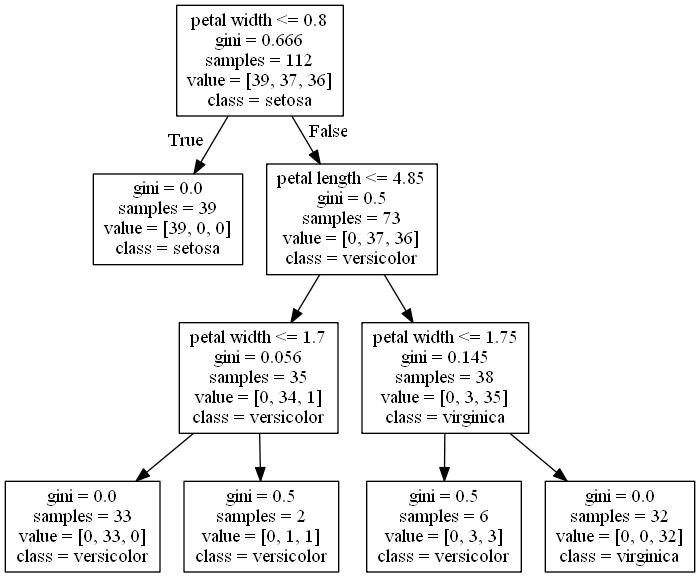

In [17]:
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus

f = export_graphviz(clf, out_file=None, feature_names=['sepal.length', 'sepal.width', 'petal length', 'petal width'],  
                    class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(f)
Image(graph.create_png())